<a href="https://colab.research.google.com/github/eliot28/desafioLatam/blob/main/Tutoria_1_python_estadistica_g91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Cálculo de indicadores estadísticos en DataFrames. ok
2. Medidas de tendencia central. ok
3. Indicadores de posición. ok
4. Medidas de dispersión. ok
5. Indicadores agrupados y tablas pivote.


In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('ramen-ratings.xlsx')
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [8]:
df['Stars'].value_counts(dropna=False)

,count
Stars,
4,393
5,386
3.75,350
3.5,335
3,176
3.25,170
4.25,143
4.5,135
2.75,85


In [9]:
df = df[df['Stars']!='Unrated']

In [10]:
df.dtypes

,0
Review #,int64
Brand,object
Variety,object
Style,object
Country,object
Stars,object
Top Ten,object


In [11]:
df['Stars'] = pd.to_numeric(df['Stars'])

In [14]:
df.dtypes

,0
Review #,int64
Brand,object
Variety,object
Style,object
Country,object
Stars,float64
Top Ten,object


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2577 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  2577 non-null   int64  
 1   Brand     2577 non-null   object 
 2   Variety   2577 non-null   object 
 3   Style     2575 non-null   object 
 4   Country   2577 non-null   object 
 5   Stars     2577 non-null   float64
 6   Top Ten   41 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 161.1+ KB


In [17]:
df.describe()

,Review #,Stars
count,2577.000000,2577.000000
mean,1289.443927,3.654676
std,744.569010,1.015331
min,1.000000,0.000000
25%,645.000000,3.250000
50%,1289.000000,3.750000
75%,1934.000000,4.250000
max,2580.000000,5.000000


In [13]:
promedio = df['Stars'].mean()
print(f'El promedio es: {round(promedio,2)}')

El promedio es: 3.65


In [22]:
moda = df['Stars'].mode()
print(f'La moda es: {moda}')

La moda es: 0    4.0
Name: Stars, dtype: float64


In [23]:
mediana = df['Stars'].median()
print(f'la mediana es: {mediana}')

la mediana es: 3.75


In [15]:
desviación_estandar = df['Stars'].std()
print(f'La desviacion estandar es : {round(desviación_estandar,2)}')

La desviacion estandar es : 1.02


In [18]:
min = df['Stars'].min()
print(f'el valor minimo es: {round(min,2)}')

el valor minimo es: 0.0


In [19]:
max = df['Stars'].max()
print(f'el valor minimo es: {round(max,2)}')

el valor minimo es: 5.0


In [20]:
cuantil25 = df['Stars'].quantile(0.25)
cuantil50 = df['Stars'].quantile(0.5)
cuantil75 = df['Stars'].quantile(0.75)

print(f'el cualtil 25% es: {cuantil25}')
print(f'el cualtil 50% es: {cuantil50}')
print(f'el cualtil 75% es: {cuantil75}')

el cualtil 25% es: 3.25
el cualtil 50% es: 3.75
el cualtil 75% es: 4.25


In [21]:
rango = max -min
print(f'El rango es: {rango}')

El rango es: 5.0


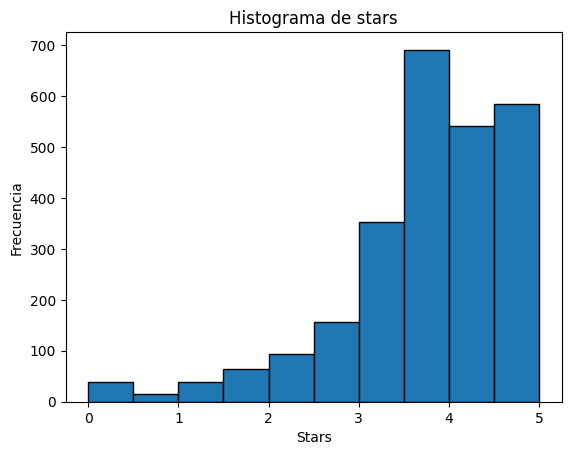

In [41]:
import matplotlib.pyplot as plt
plt.hist(df['Stars'], bins =10,edgecolor='black')

plt.title('Histograma de stars')
plt.xlabel('Stars')
plt.ylabel('Frecuencia')

plt.show()

In [24]:
df.dtypes

,0
Review #,int64
Brand,object
Variety,object
Style,object
Country,object
Stars,float64
Top Ten,object


In [32]:
estilos_por_paises = pd.pivot_table(df,
                                    values='Stars',
                                    columns = 'Style',
                                    index= 'Country',
                                    aggfunc=['mean'])
estilos_por_paises = estilos_por_paises.fillna(0)
estilos_por_paises

mean                                                   
Style          Bar      Bowl   Box  Can       Cup      Pack      Tray
Country                                                              
Australia      0.0  0.000000  0.00  0.0  3.120588  3.200000  0.000000
Bangladesh     0.0  0.000000  0.00  0.0  0.000000  3.714286  0.000000
Brazil         0.0  0.000000  0.00  0.0  4.500000  4.250000  0.000000
Cambodia       0.0  0.000000  0.00  0.0  0.000000  4.200000  0.000000
Canada         0.0  2.281250  0.00  0.0  1.970588  2.515625  0.000000
China          0.0  3.527778  0.00  0.0  2.859375  3.538776  2.583333
Colombia       0.0  0.000000  0.00  0.0  3.083333  3.500000  0.000000
Dubai          0.0  0.000000  0.00  0.0  0.000000  3.583333  0.000000
Estonia        0.0  0.000000  0.00  0.0  0.000000  3.500000  0.000000
Fiji           0.0  0.000000  0.00  0.0  0.000000  3.875000  0.000000
Finland        0.0  0.000000  0.00  0.0  0.000000  3.583333  0.000000
Germany        0.0  0.000000  0.00  0.0  3.704545  3.593750  0.000000
Ghana          0.0  0.000000  0.00  0.0  0.000000  3.500000  0.000000
Holland        0.0  0.000000  0.00  0.0  0.000000  3.562500  0.000000
Hong Kong      0.0  3.735000  0.00  0.0  4.039474  3.702239  3.625000
Hungary        0.0  0.000000  0.00  0.0  0.000000  3.611111  0.000000
India          0.0  0.000000  0.00  0.0  2.583333  3.482143  0.000000
Indonesia      0.0  0.000000  4.25  0.0  3.940476  4.091346  0.000000
Japan          0.0  4.140278  5.00  0.0  3.940816  3.801613  4.375000
Malaysia       0.0  4.281250  5.00  0.0  4.011905  4.156452  0.000000
Mexico         0.0  0.000000  0.00  0.0  3.733333  3.725000  0.000000
Myanmar        0.0  0.000000  0.00  0.0  4.083333  3.909091  0.000000
Nepal          0.0  0.000000  0.00  0.0  0.000000  3.553571  0.000000
Netherlands    0.0  0.000000  0.00  0.0  1.333333  2.770833  0.000000
Nigeria        0.0  0.000000  0.00  0.0  0.000000  1.500000  0.000000
Pakistan       0.0  0.000000  0.00  0.0  0.000000  3.000000  0.000000
Philippines    0.0  3.375000  0.00  0.0  2.937500  3.363636  0.000000
Poland         0.0  0.000000  0.00  0.0  0.000000  3.625000  0.000000
Sarawak        0.0  0.000000  0.00  0.0  0.000000  4.333333  0.000000
Singapore      0.0  4.096154  0.00  0.0  3.925926  4.210145  0.000000
South Korea    0.0  3.865809  0.00  0.0  3.500000  3.857459  3.479167
Sweden         0.0  0.000000  0.00  0.0  0.000000  3.250000  0.000000
Taiwan         0.0  3.263514  0.00  0.0  3.250000  3.761326  3.333333
Thailand       0.0  3.142045  0.00  0.0  3.588542  3.386598  3.750000
UK             0.0  3.250000  0.00  0.0  2.978125  3.000000  0.000000
USA            5.0  3.400000  1.50  3.5  3.376786  3.554688  3.408654
United States  0.0  0.000000  0.00  0.0  0.000000  3.750000  0.000000
Vietnam        0.0  3.362500  0.00  0.0  2.656250  3.183333  3.750000

In [35]:
estilos_por_paises_groupby = df.groupby(['Country','Style'])['Stars'].mean().unstack()
estilos_por_paises_groupby = estilos_por_paises_groupby.fillna(0)
estilos_por_paises_groupby

Style,Bar,Bowl,Box,Can,Cup,Pack,Tray
Country,,,,,,,
Australia,0.0,0.000000,0.00,0.0,3.120588,3.200000,0.000000
Bangladesh,0.0,0.000000,0.00,0.0,0.000000,3.714286,0.000000
Brazil,0.0,0.000000,0.00,0.0,4.500000,4.250000,0.000000
Cambodia,0.0,0.000000,0.00,0.0,0.000000,4.200000,0.000000
Canada,0.0,2.281250,0.00,0.0,1.970588,2.515625,0.000000
China,0.0,3.527778,0.00,0.0,2.859375,3.538776,2.583333
Colombia,0.0,0.000000,0.00,0.0,3.083333,3.500000,0.000000
Dubai,0.0,0.000000,0.00,0.0,0.000000,3.583333,0.000000
Estonia,0.0,0.000000,0.00,0.0,0.000000,3.500000,0.000000


In [36]:
df_salaries = pd.read_csv('ds_salaries.csv')
df_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
sort_values() ## para ordenar el DF